In [1]:
import pandas as pd
import re
import nltk

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset/ulasan_tiktok.csv')
data.head(100)

,comment,Label
0,Aplikasi ini sangat bagus sekali,Positif
1,Aplikasi mantap ...,Positif
2,Jangan Download aplikasi jelek banget Tapi boh...,Positif
3,Aplikasi ini bagus banget,Positif
4,Aplikasi ini bagus banget kalian harus downloa...,Positif
...,...,...
95,Bacot aplikasi tai misi sudah dilakukan tapi t...,Positif
96,asik dapat koin dari Tiktok 10000k .. Bisa diu...,Positif
97,"Bagus aplikasi, buat yang masih dibawah umur, ...",Positif
98,Bagus banget Kalian harus pu aplikasi ini karn...,Positif


In [3]:
data.isna().sum()

comment    0
Label      0
dtype: int64

# def labelData(Rating):
    if Rating > 3:
        return 'Positif'
    else:
        return 'Negatif'
    
data['Label']=data['Rating'].apply(labelData)
data.head(10)

In [4]:
data["Label"].value_counts()

Positif    1206
Negatif     294
Name: Label, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


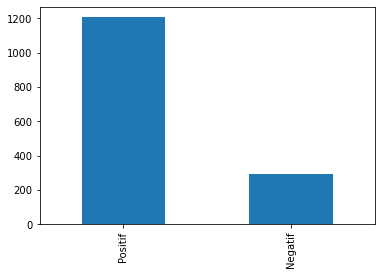

In [5]:
print (data['Label'].value_counts().plot(kind="bar"))

In [7]:
data[data['comment'].str.contains('https://')]

,comment,Label


In [3]:
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words('indonesian'))

def CleanComment(txt):
    txt = re.sub(r'http\S+','',txt)
    txt = re.sub('[^a-zA-Z]',' ',txt)
    txt = str(txt).lower()
    txt = word_tokenize(txt)
    txt = [item for item in txt if item not in stop_words]
    txt = [lemma.lemmatize(word=w,pos='v')for w in txt]
    txt = [i for i in txt if len(i) > 2]
    txt = ' '.join(txt)
    return txt

data['CleanComment'] = data['comment'].apply(CleanComment)

In [9]:
data.head(10)

,comment,Label,CleanComment
0,Aplikasi ini sangat bagus sekali,Positif,aplikasi bagus
1,Aplikasi mantap ...,Positif,aplikasi mantap
2,Jangan Download aplikasi jelek banget Tapi boh...,Positif,download aplikasi jelek banget bohong ayu
3,Aplikasi ini bagus banget,Positif,aplikasi bagus banget
4,Aplikasi ini bagus banget kalian harus downloa...,Positif,aplikasi bagus banget download lupa
5,"Aplikasi dijamin ya sudah terbukti membayar, a...",Positif,aplikasi dijamin terbukti membayar ayo ikutan ...
6,Senang terus nonton video disini bagus-bagus k...,Positif,senang nonton video bagus bagus konten monoton...
7,Bagus sudah dibilang bagus,Positif,bagus dibilang bagus
8,Aplikasi kok begini Tapi bagus ini wajib download,Positif,aplikasi bagus wajib download
9,Untukmu pemilik Tiktok Terima kasih sebelum te...,Negatif,untukmu pemilik tiktok terima kasih hadiah per...


In [4]:
# data = data.drop(columns='Nama')
# data = data.drop(columns='Tanggal')
# data = data.drop(columns='Rating')
data = data.drop(columns='comment')
data.head()

,Label,CleanComment
0,Positif,aplikasi bagus
1,Positif,aplikasi mantap
2,Positif,download aplikasi jelek banget bohong ayu
3,Positif,aplikasi bagus banget
4,Positif,aplikasi bagus banget download lupa


In [8]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

review = []
for index, row in data.iterrows():
    review.append(stopword.remove(row["CleanComment"]))
data['CleanComment'] = review
data['CleanComment'].head()

0                               aplikasi bagus
1                              aplikasi mantap
2    download aplikasi jelek banget bohong ayu
3                        aplikasi bagus banget
4          aplikasi bagus banget download lupa
Name: CleanComment, dtype: object

In [5]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

review = []
for index, row in data.iterrows():
    review.append(stemmer.stem(row["CleanComment"]))
    
data['CleanComment'] = review
data['CleanComment'].head()

0                               aplikasi bagus
1                              aplikasi mantap
2    download aplikasi jelek banget bohong ayu
3                        aplikasi bagus banget
4          aplikasi bagus banget download lupa
Name: CleanComment, dtype: object

In [7]:

# vectorizer = TfidfVectorizer(ngram_range=(2,2))
# vectorizer = TfidfVectorizer(stop_words='english')
# response = vectorizer.fit_transform(data['CleanComment'])
# print(response)


from sklearn.feature_extraction.text import TfidfVectorizer
n_gram_vect = TfidfVectorizer(ngram_range=(1,1))
x_counts = n_gram_vect.fit_transform(data['CleanComment'])
x_counts_df = pd.DataFrame(x_counts.toarray())
x_counts_df.columns = n_gram_vect.get_feature_names()
x_counts_df.head(10)

,account,ada,adakan,adegan,adik,adil,admin,adu,aduh,agama,...,yeay,yes,yok,you,youtube,yuhuuuu,yuk,yzg,zngjpywt,zulfa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
vectorizer.get_feature_names()

In [ ]:
response.todense()

In [ ]:
import pandas as pd

df = pd.DataFrame(response.todense().T,
                 index=vectorizer.get_feature_names(),
                 columns=[f'D{i+1}' for i in range(len(data['CleanComment']))])
df.T

In [8]:
target = data['Label']

In [9]:
target

0       Positif
1       Positif
2       Positif
3       Positif
4       Positif
         ...   
1495    Negatif
1496    Negatif
1497    Negatif
1498    Negatif
1499    Negatif
Name: Label, Length: 1500, dtype: object

In [10]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x_counts_df, target, test_size=0.3, random_state=300)
tree_dataset = DecisionTreeClassifier(random_state=300, max_depth=5)

tree_dataset.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, random_state=300)

In [30]:
y_pred = tree_dataset.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix")
print(cm)
akurasi = classification_report(ytest, y_pred)
print("Tingkat Akurasi Algoritma Decision Tree")
print("Akurasi : ", akurasi)
akurasi = accuracy_score(ytest, y_pred)
print("Tingkat Akurasi: %d persen" %(akurasi*100))

Confusion Matrix
[[ 13  87]
 [ 15 335]]
Tingkat Akurasi Algoritma Decision Tree
Akurasi :                precision    recall  f1-score   support

     Negatif       0.46      0.13      0.20       100
     Positif       0.79      0.96      0.87       350

    accuracy                           0.77       450
   macro avg       0.63      0.54      0.54       450
weighted avg       0.72      0.77      0.72       450

Tingkat Akurasi: 77 persen


In [19]:
DT = DecisionTreeClassifier(random_state=42)
cross_val_score(DT, x_counts_df, target, cv=10)

array([0.84      , 0.76666667, 0.81333333, 0.80666667, 0.75333333,
       0.76      , 0.84666667, 0.82      , 0.84666667, 0.86      ])

In [16]:
columns = {"Label Sebenarnya":ytest ,"Hasil Prediksi":y_pred}
DF = pd.DataFrame(columns)
DF.head()

,Label Sebenarnya,Hasil Prediksi
1116,Positif,Positif
1368,Positif,Positif
422,Positif,Positif
413,Negatif,Positif
451,Positif,Positif


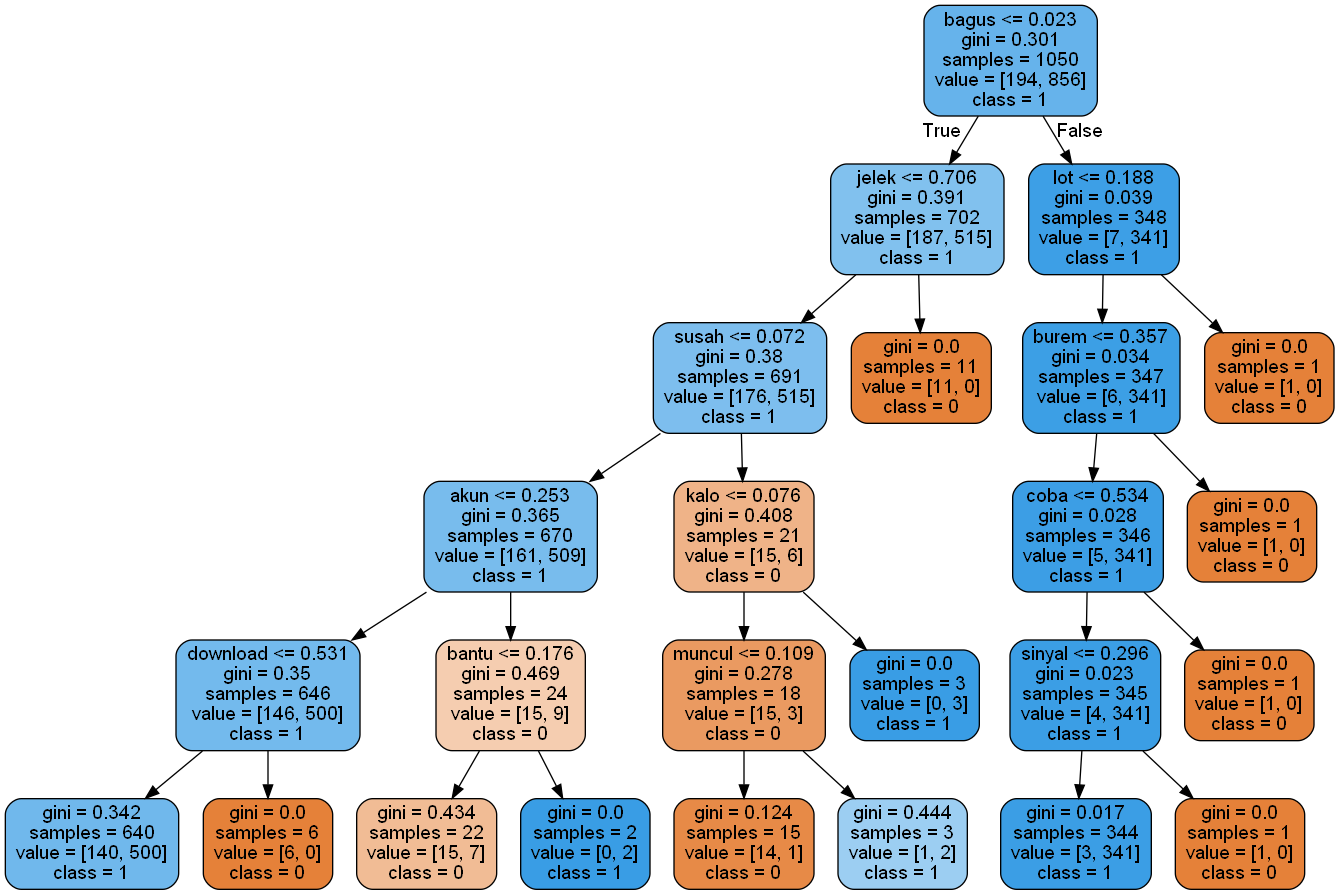

In [31]:
import pydotplus
from IPython.display import Image
import matplotlib.image as pltimg
from sklearn import tree

dot_data = tree.export_graphviz(tree_dataset, out_file=None, feature_names=x_counts_df.columns,
                               class_names=['0', '1'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [ ]:
model = decisiontree.fit(x, y)